In [1]:
import sympy
from sympy import *
from sympy.vector import *
init_printing()

1.  Como sabemos, una partícula que se mueve en un campo de fuerzas estará sujeta en cada punto a esta fuerza ${\bf f}({\bf r})$ de manera que el cambio de energía potencial es 
$$
U({\bf r})-U({\bf r}_0)=-\int_{{\bf r}_0}^{{\bf r}} {\bf f}({\bf r})
\cdot \mathrm{d} {\bf r} \,.
$$

Sea el siguiente campo de fuerzas
$$
{\bf f}_1({\bf r})= 3xy^3 \hat{i} + 3x^2y^2\hat{j}\,.
$$

En primer lugar, consideremos que la partícula se mueve desde el punto $(0,0)$ al punto $(a,b)$ siguiendo las lineas rectas: 

$(0,0) \rightarrow (a,0) \rightarrow (a,b)$. 

Calculemos el trabajo realizado sobre la partícula 

In [2]:
# Definimos la función
x, y, z = symbols('x y z', real=True)
f1= [3*x*y**3,3*x**2*y**2,0]
f1

In [3]:
r= [x,y,z]
dr= [diff(x, x), diff(y, y), diff(z, z)]
dr

Evaluamos la función para la trayectoria $(0,0) \rightarrow (a,0) \rightarrow (a,b)$.

In [4]:
a,b = symbols('a b', real=True)
f1x=f1[0].subs({y:0})
f1y=f1[1].subs({x:a})
f1a=[f1x,f1y,0]
f1a

In [5]:
integrate(f1x,(x,0,a)) + integrate(f1y,(y,0,b))

Supongamos ahora que la partícula se mueve siguiendo la trayectoria $y=bx^3/a^3$. 

In [6]:
y2=b*x**3/a**3

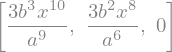

In [7]:
f1x=f1[0].subs({y:y2})
f1y=f1[1].subs({y:y2})
f1b=[f1x,f1y,0]
f1b

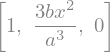

In [8]:
dr= [diff(x, x), diff(y2, x), 0]
dr

Hacemos el producto  $f_1.dr$

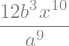

In [9]:
f1bdr=sum([m*n for m,n in zip(f1b,dr)])
f1bdr

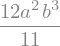

In [10]:
integrate(f1bdr,(x,0,a))

El resultado es diferente, el campo de fuerzas no es conservativo 

In [11]:
R = CoordSys3D('R')
curl(3*R.x*R.y**3*R.i + 3*R.x**2*R.y**2*R.j+0*R.k)

2. Consideremos ahora el siguiente campo 

${\bf f}_2({\bf r})= 2xy^3 \hat{i} + 3x^2y^2\hat{j}$, 

ligeramente diferente al anterior y repitamos los cálculos.

In [12]:
x, y, z = symbols('x y z', real=True)
f2= [2*x*y**3,3*x**2*y**2,0]
f2

Trayectoria $(0,0) \rightarrow (a,0) \rightarrow (a,b)$

In [13]:
a,b = symbols('a b', real=True)
f2x=f2[0].subs({y:0})
f2y=f2[1].subs({x:a})
f2a=[f2x,f2y,0]
f2a

In [14]:
r= [x,y,z]
dr= [diff(x, x), diff(y, y), diff(z, z)]

In [15]:
integrate(f2x,(x,0,a)) + integrate(f2y,(y,0,b))

Trayectoria $y=bx^3/a^3$. 

In [16]:
y2=b*x**3/a**3
f2xb=f2[0].subs({y:y2})
f2yb=f2[1].subs({y:y2})
f2b=[f2xb,f2yb,0]
dr= [1,diff(y2,x),0]

In [17]:
f2bdr=sum([m*n for m,n in zip(f2b,dr)])
f2bdr
integrate(f2bdr,(x,0,a))

El trabajo es el mismo ya que el campo vectorial es conservativo

In [18]:
curl(2*R.x*R.y**3*R.i + 3*R.x**2*R.y**2*R.j+0*R.k)

El potencial asociado a campo se puede calcular ahora

In [19]:
U=-(integrate(f2[0].subs(x,0),x) + integrate(f2[1],y))
U

3. Consideremos el siguiente campo vectorial en el plano
$$
{\bf f}= \kappa\left[  xy^2 \hat{i} + x^2 y\hat{j}\right]\,,
$$
con $\kappa$ constante.

In [20]:
k, x, y = symbols('k x y', real=True)
f= [k*x*y**2,k*x**2*y,0]
f

Es fácil comprobar que ${\boldsymbol \nabla}\times{\bf f}=0$, de manera que {\bf f} es conservativo.

In [21]:
curl(k*R.x*R.y**2*R.i + k*R.x**2*R.y*R.j)

In [22]:
x1,y2,τ = symbols('x1 y2 τ')
x_sub = x1*τ
y_sub = y2*τ
dr = [diff(x_sub, τ), diff(y_sub, τ)]
dr

In [23]:
Fdr=sum([a*b for a,b in zip(f,dr)])
Fdr=Fdr.subs({x:x_sub,y:y_sub})
Fdr

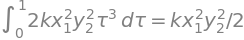

In [24]:
Eq(Integral(Fdr,(τ,0,1)),integrate(Fdr,(τ,0,1)).simplify())

Para el potencial:

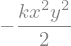

In [25]:
U=-(integrate(f[0].subs(x,0),x) + integrate(f[1],y))
U

In [26]:
gradient(-k*R.x**2*R.y**2/2)

3. Consideremos el siguiente campo vectorial 
$$
{\bf f}= \frac{\kappa y}{x^2+y^2}  \hat{i} - \frac{\kappa x}{x^2+y^2}\hat{j}\,,
$$
con $\kappa$ constante.

De nuevo, es fácil ver que 
$$
{\boldsymbol \nabla} \times {\bf f} =
\left[ \partial_x F_y - \partial_y F_x \right] \hat{k}=0\,.
$$

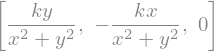

In [27]:
k, a, x, y, τ = symbols('k a x y τ', real=True)
f= [k*y/(x**2+y**2),-k*x/(x**2+y**2),0]
f

Si calculamos el rotor, resulta 

In [28]:
curl(k*R.y/(R.x**2+R.y**2)*R.i - k*R.x/(R.x**2+R.y**2)*R.j).simplify()

In [29]:
x_sub = a*cos(τ)
y_sub = a*sin(τ)
dr = [diff(x_sub, τ), diff(y_sub, τ)]
dr

In [30]:
Fdr=sum([a*b for a,b in zip(f,dr)])
Fdr=Fdr.subs({x:x_sub,y:y_sub}).simplify()
Fdr

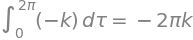

In [31]:
Eq(Integral(Fdr,(τ,0,2*pi)), integrate(Fdr,(τ,0,2*pi)).simplify())